In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel(r"C:\Users\HP\Downloads\archive\dataset.xlsx")

In [2]:
df=data.copy()

In [3]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#savoir nbre de ligne et colonne
data.shape

(5644, 111)

In [5]:
#afficher le type de chaque colonne
data.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

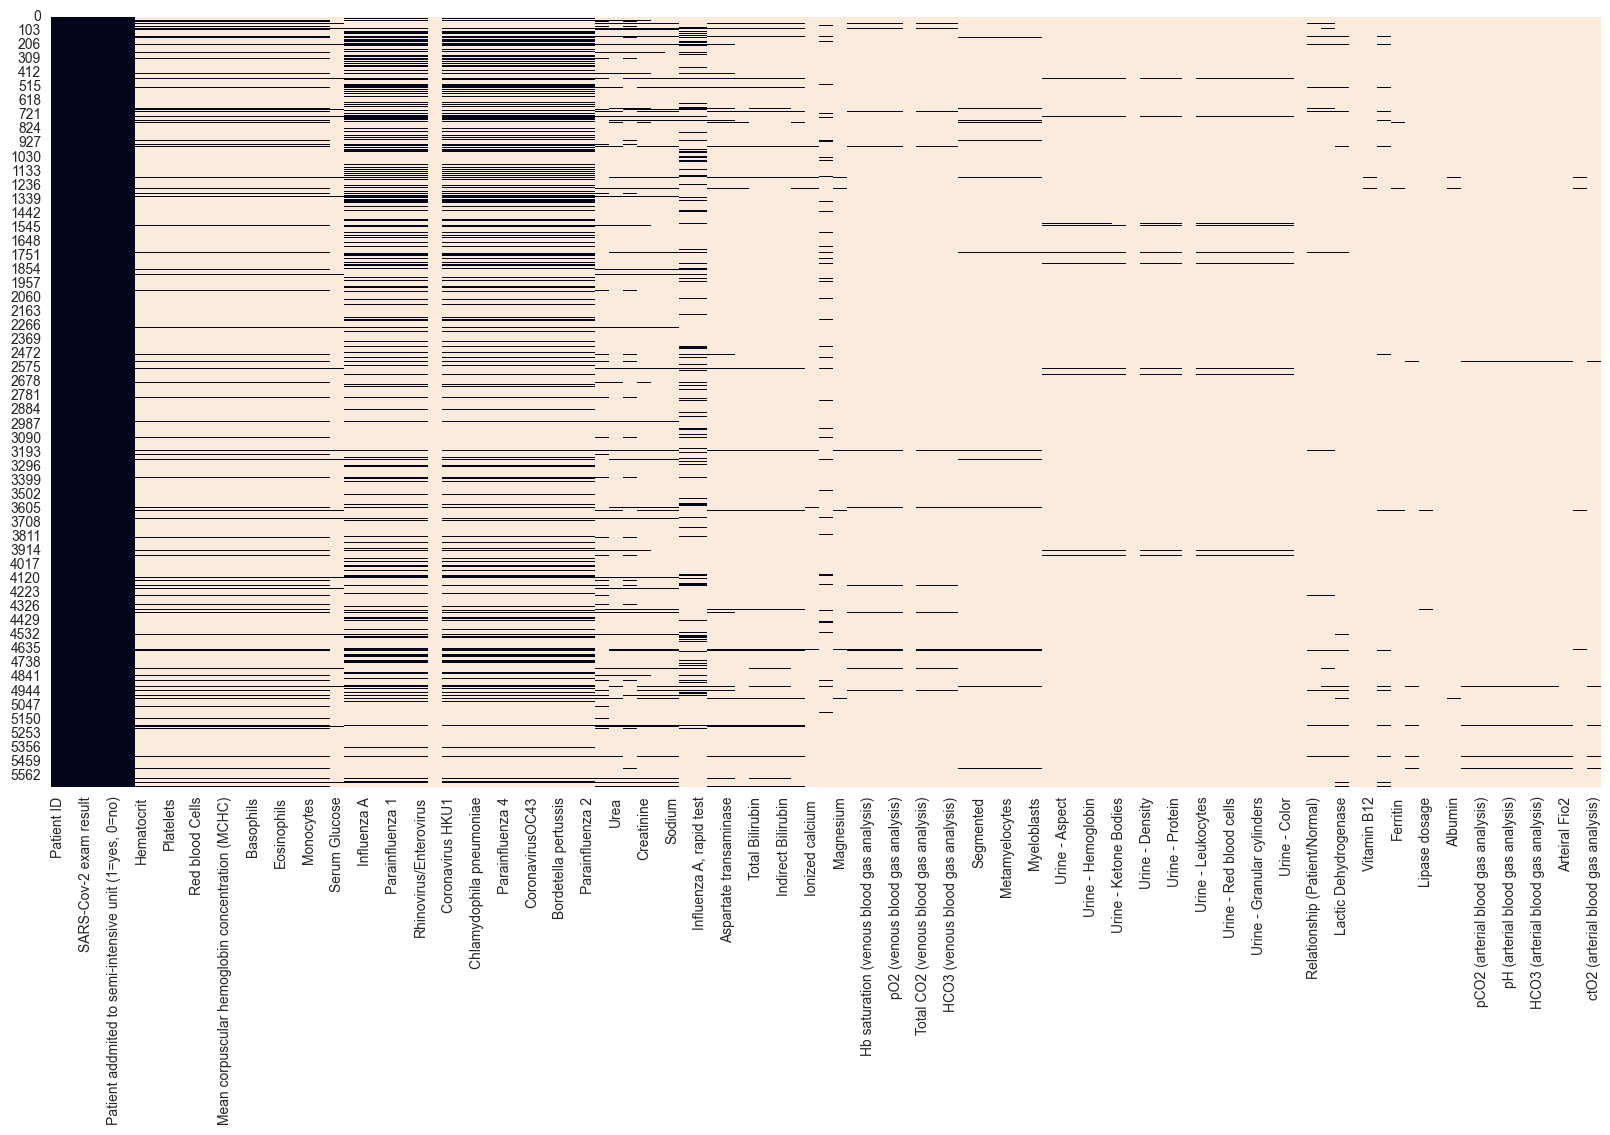

In [6]:
#affiche tout le data set pour savoir les valeur manquante 
data.isna() # pour savoir si il y a des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False) # pour savoir si il y a des valeurs manquantes


In [7]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True) # pour savoir si il y a des valeurs manquantes en ordre croissant

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Mycoplasma pneumoniae                                    1.0
Urine - Sugar                                            1.0
Prothrombin time (PT), Activity                          1.0
Partial thromboplastin time (PTT)                        1.0
D-Dimer                                                  1.0
Length: 111, dtype: float64

In [8]:
 df=df[df.columns[df.isna().sum()/data.shape[0]< 0.9]]  # injerter les colonnes dont le % de valeurs manquantes est inférieur à 90% dans un nouveau df 

<Axes: >

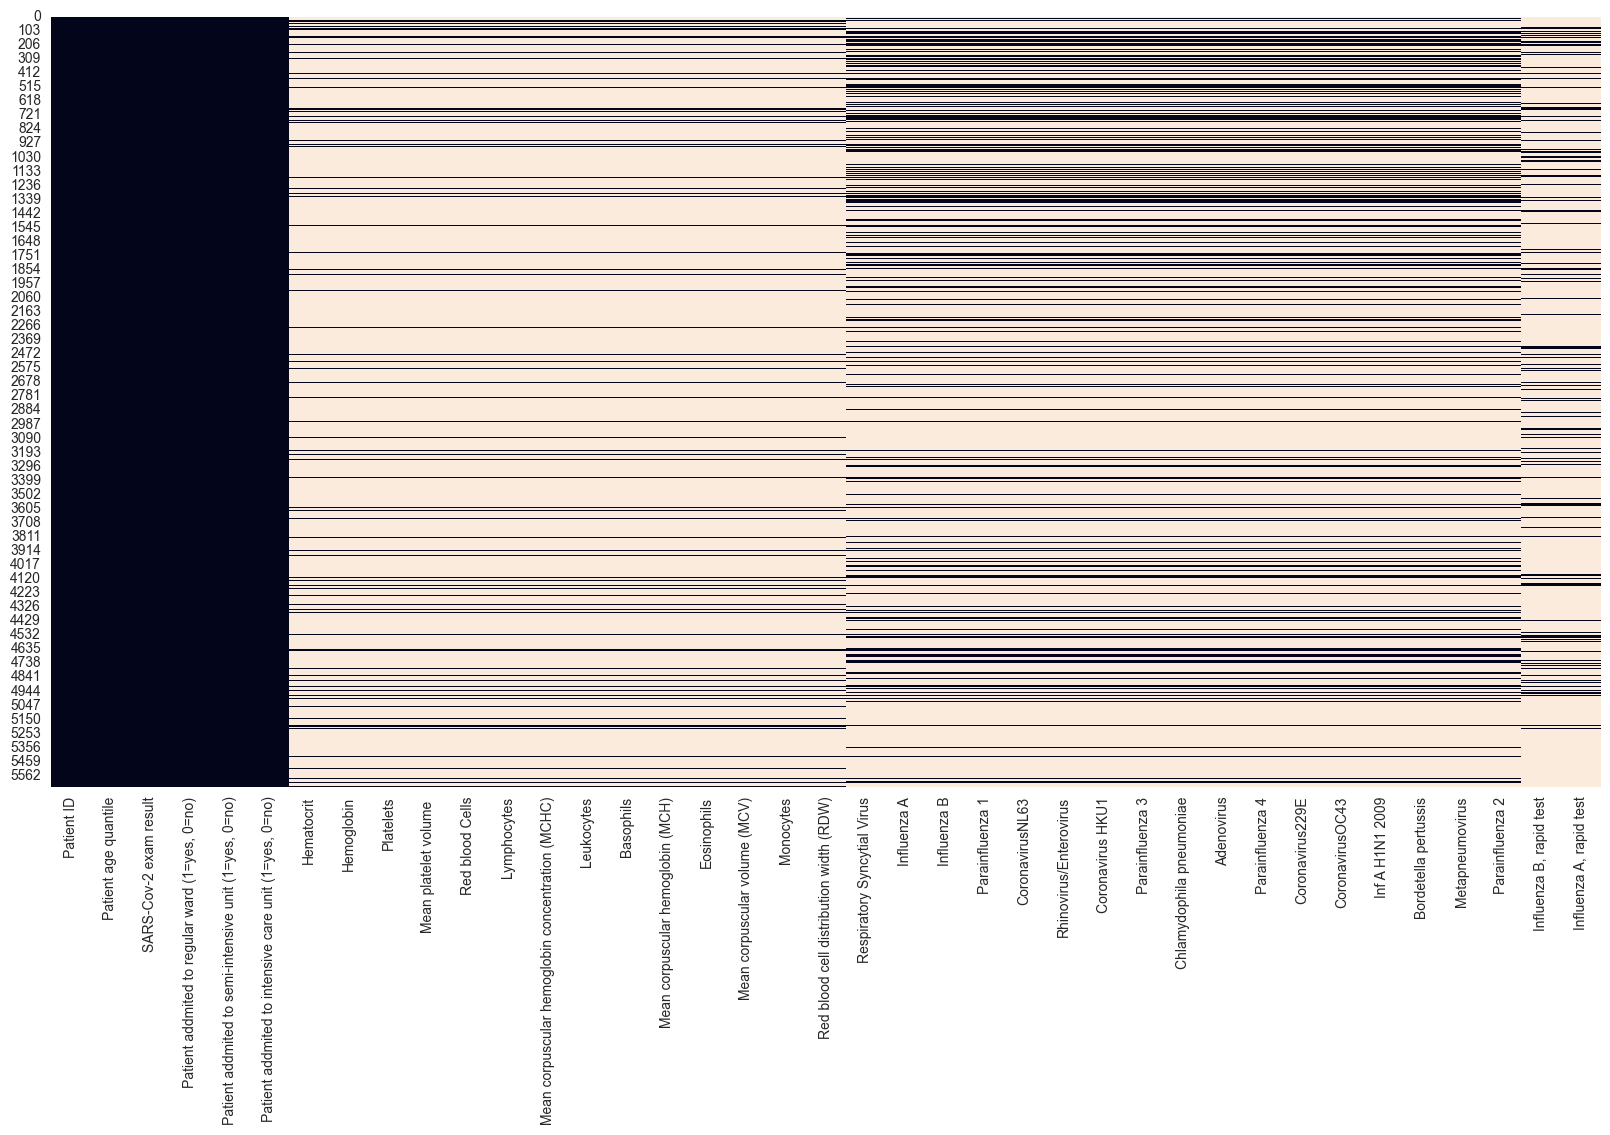

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) # pour savoir si il y a des valeurs manquantes

In [10]:
df=df.drop('Patient ID',axis=1) # supprimer la colonne Patient ID (en gros avoir des id pareil sert a rien )
print(df.columns)

Index(['Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rap

In [11]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True) # pour savoir les cas positif et negatif en %

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

histogramme des variable continu

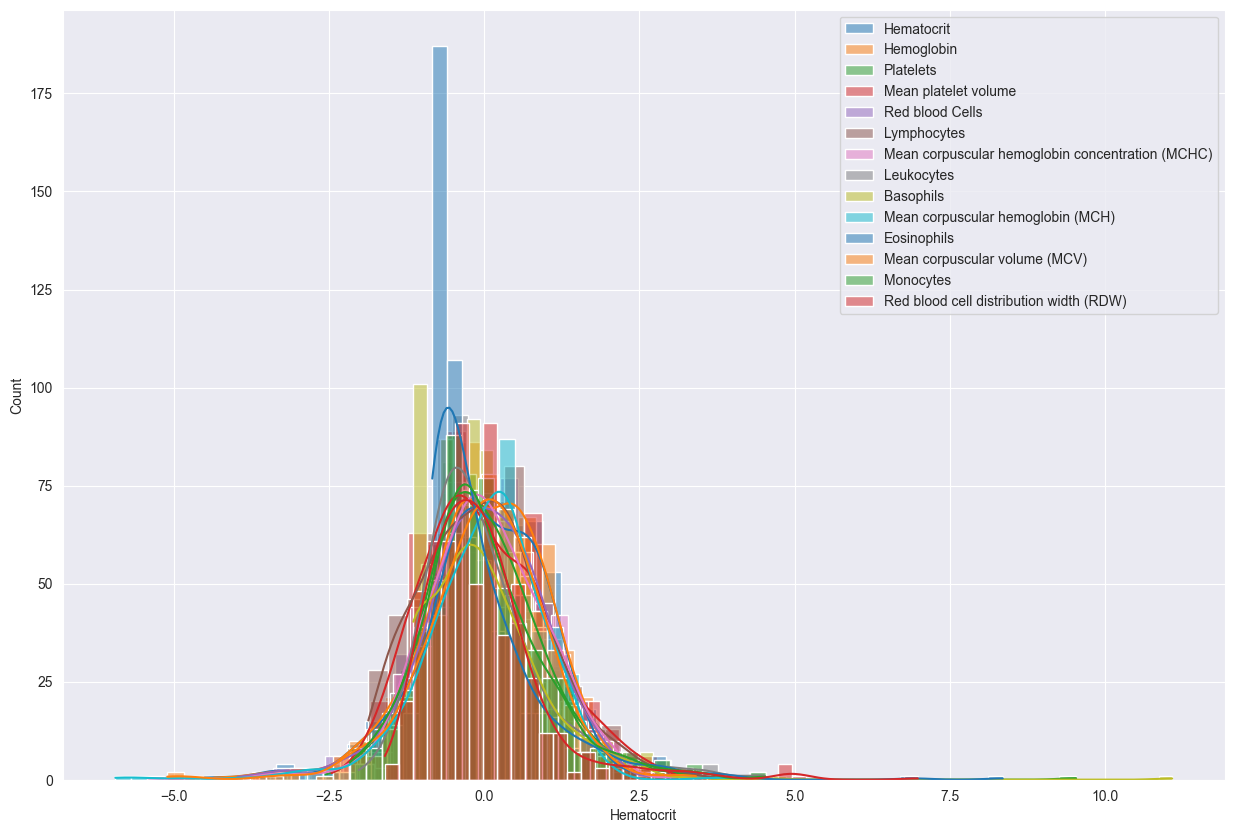

In [12]:
import matplotlib.pyplot as plt

# Créer un graphique avec plusieurs courbes (histogrammes)
plt.figure(figsize=(15, 10))  # Taille de la figure

# Boucle sur les colonnes de type float
for col in df.select_dtypes('float'):
    sns.histplot(df[col] , kde=True ,label=col, legend=True)
    
# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

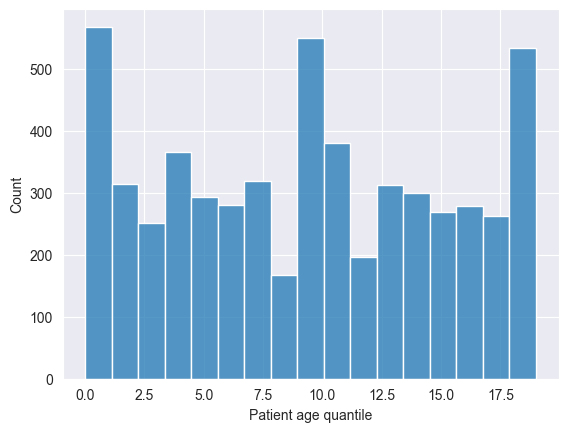

In [13]:
sns.histplot(df['Patient age quantile'])
df['Patient age quantile'].value_counts()
#df['Patient age quantile'].unique()

variable qualitative

In [14]:
df['SARS-Cov-2 exam result'].unique() 

array(['negative', 'positive'], dtype=object)

In [15]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

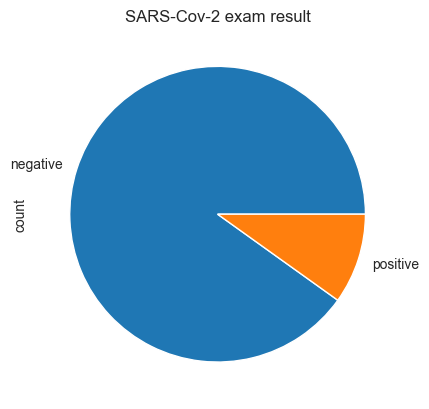

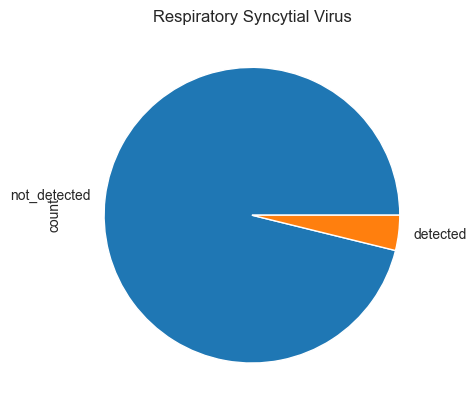

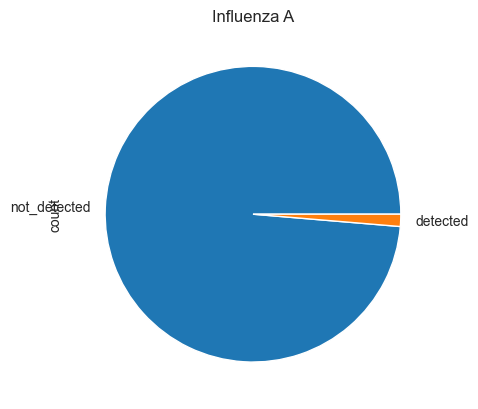

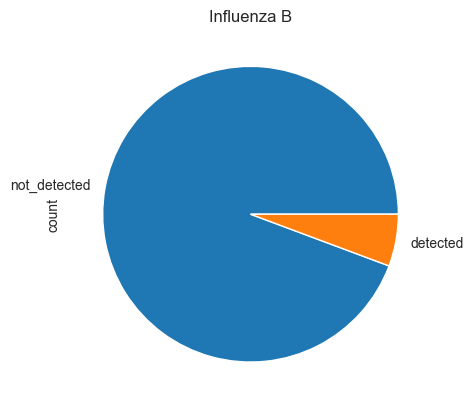

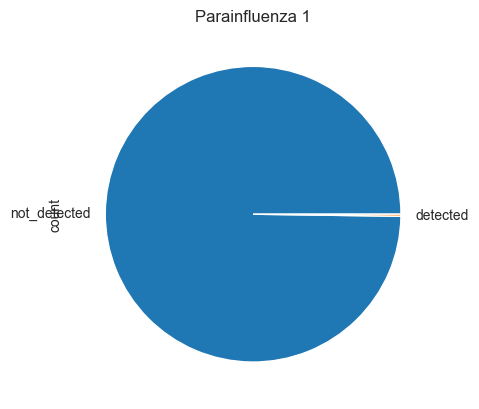

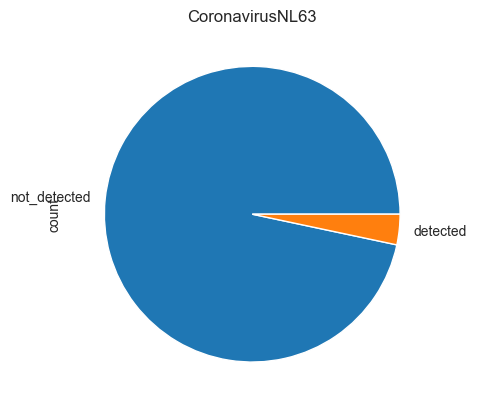

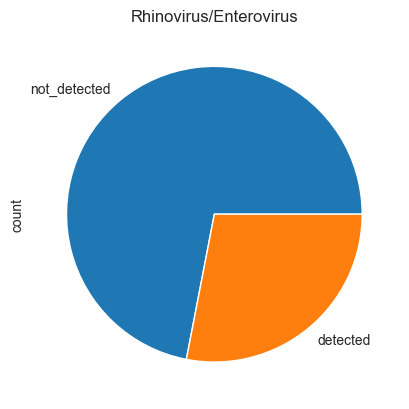

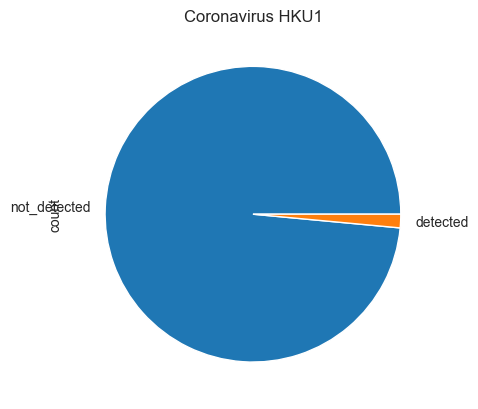

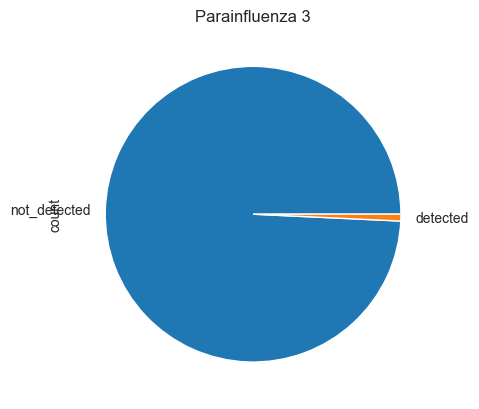

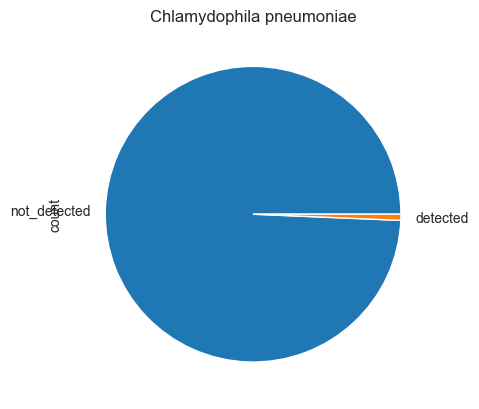

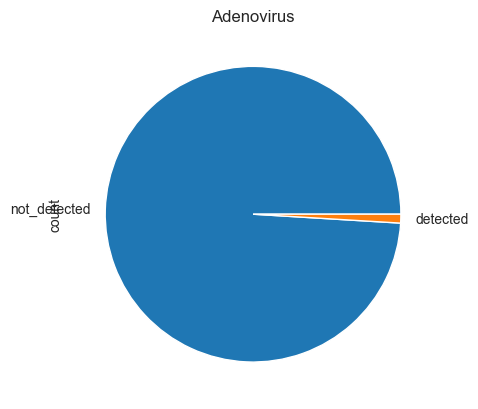

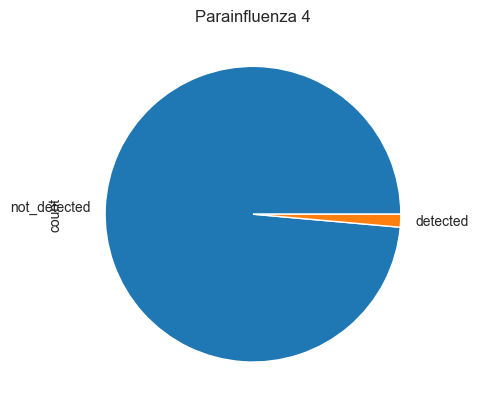

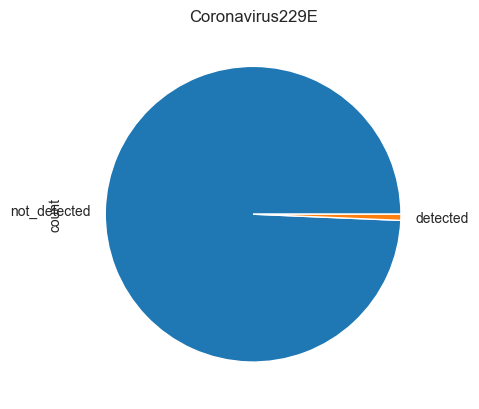

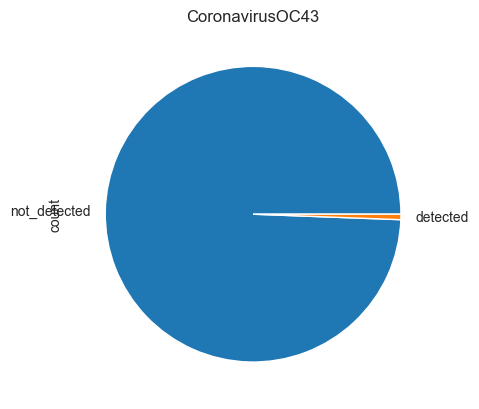

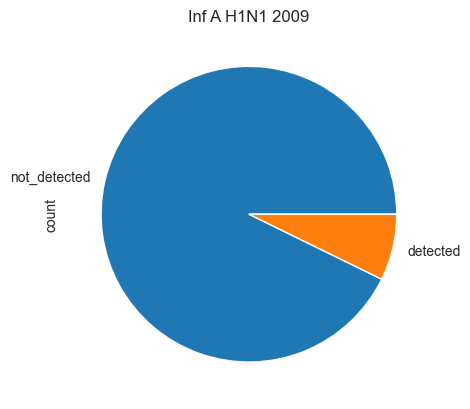

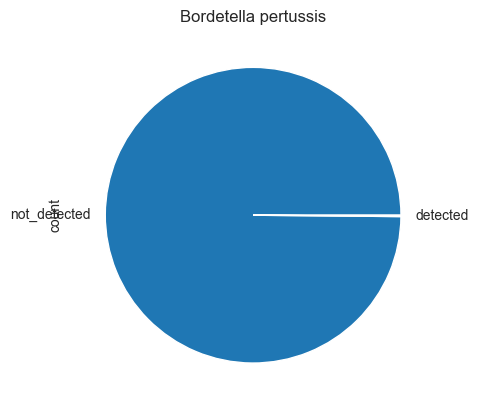

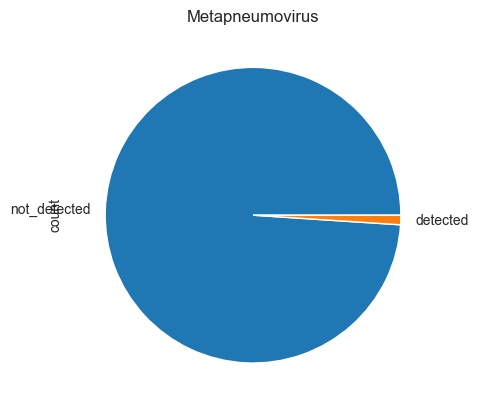

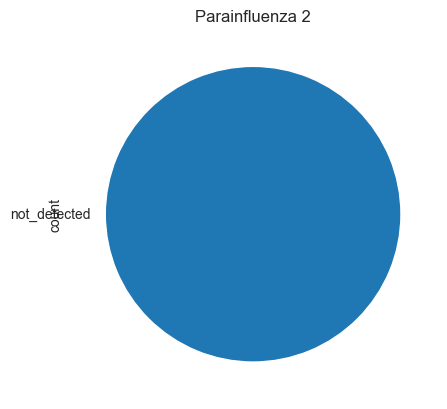

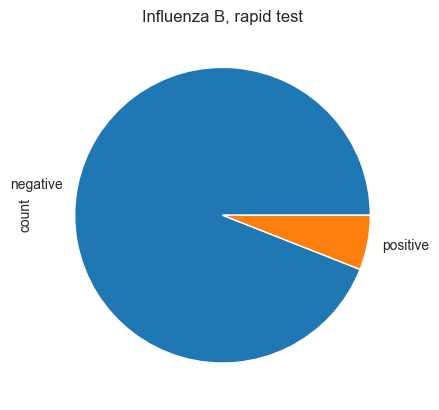

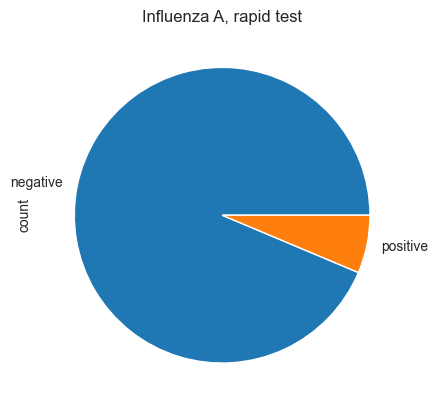

In [16]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

relattion Target / variable 
creation de sous-ensemble positif et negatif

In [17]:
df_pos = df[df['SARS-Cov-2 exam result'] == 'Positive']
df_neg = df[df['SARS-Cov-2 exam result'] == 'Negative']

In [18]:
df_pos.shape

(0, 38)

In [19]:
df_neg.shape

(0, 38)

pour afficher les collonnes dont le % de valeurs manquantes est inférieur à 90% et superieur à 80%

In [20]:
missing_rate= df.isna().sum()/df.shape[0]
blood_columns=df.columns[(missing_rate<0.9) & (missing_rate>0.8)]

In [21]:
viral_columns=df.columns[(missing_rate<0.88) & (missing_rate>0.75)]

Taeget / blood

In [22]:
print("Blood columns:", blood_columns.tolist()) 

Blood columns: ['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Influenza B, rapid test', 'Influenza A, rapid test']


In [23]:
# Création des DataFrames avec gestion des valeurs manquantes
df_pos = df[df['SARS-Cov-2 exam result'] == 'positive'].dropna(subset=blood_columns)
df_neg = df[df['SARS-Cov-2 exam result'] == 'negative'].dropna(subset=blood_columns)

In [24]:
# Vérification des tailles
print("Taille df_pos:", df_pos.shape)
print("Taille df_neg:", df_neg.shape)

Taille df_pos: (23, 38)
Taille df_neg: (173, 38)


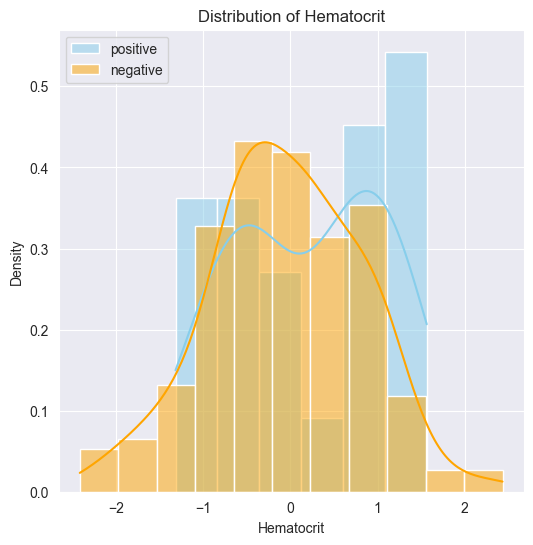

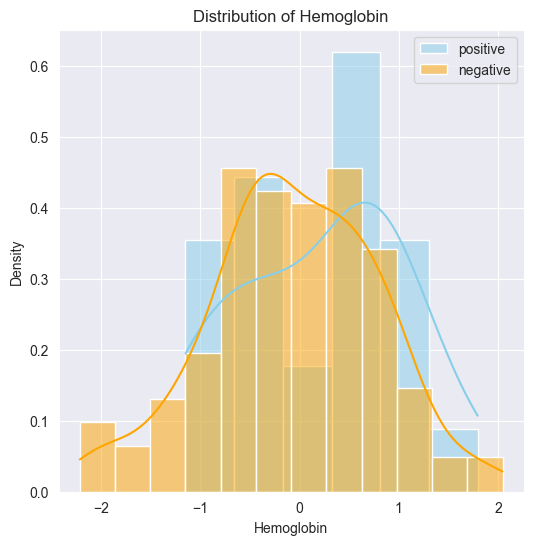

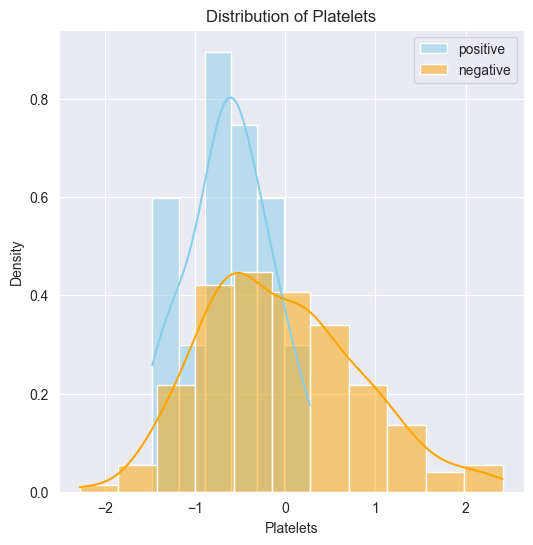

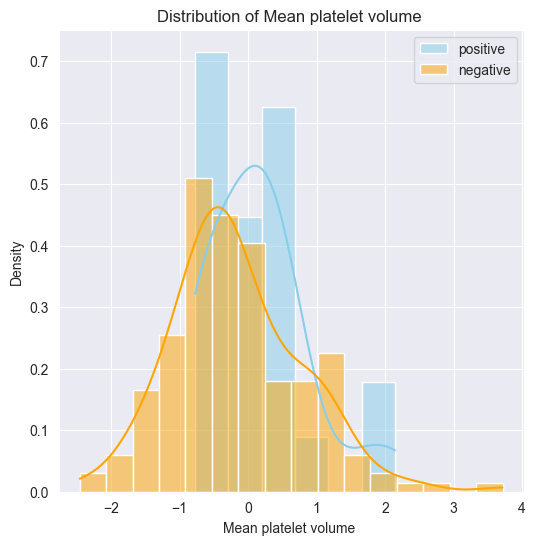

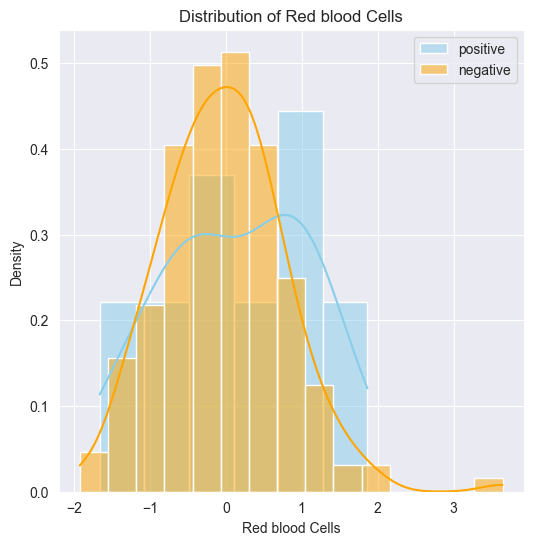

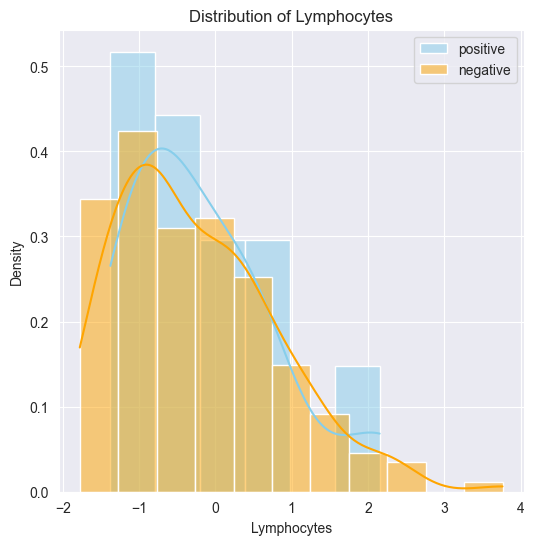

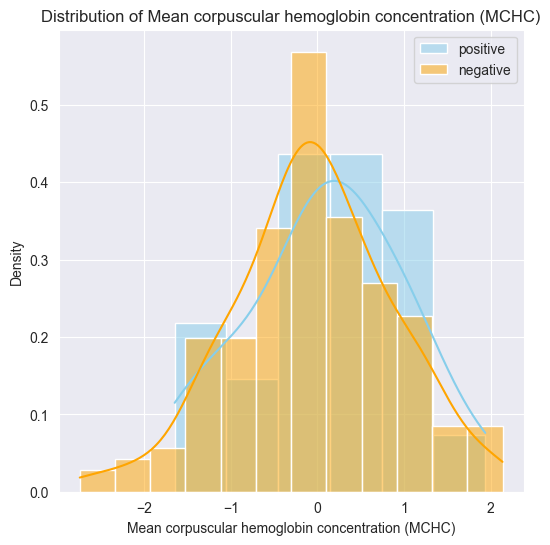

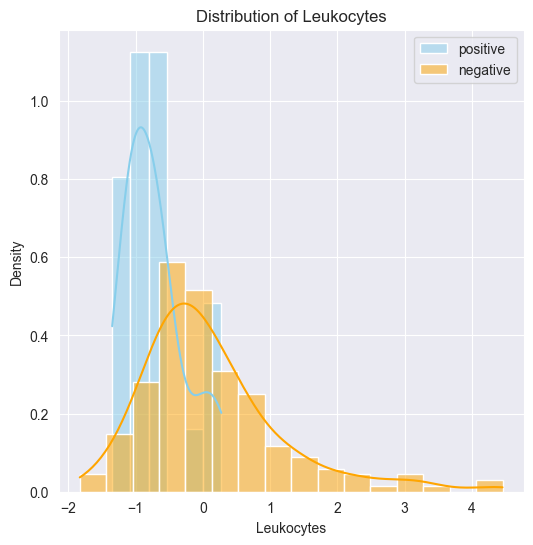

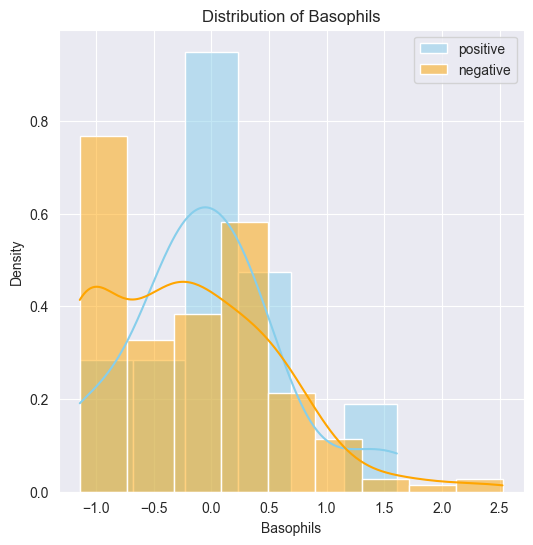

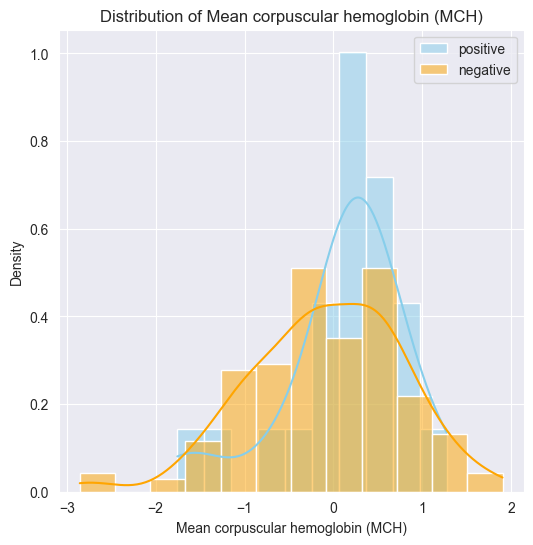

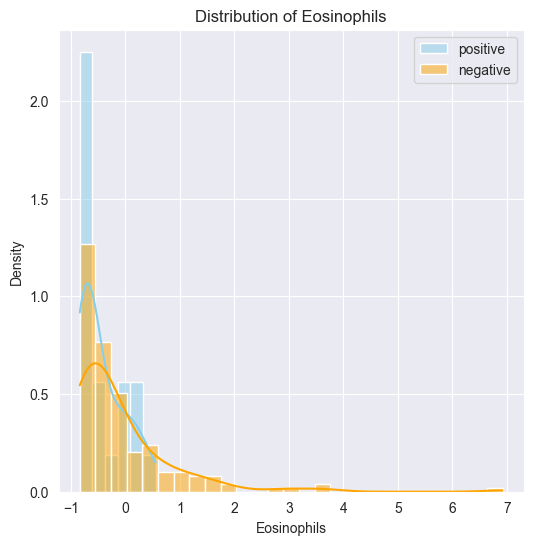

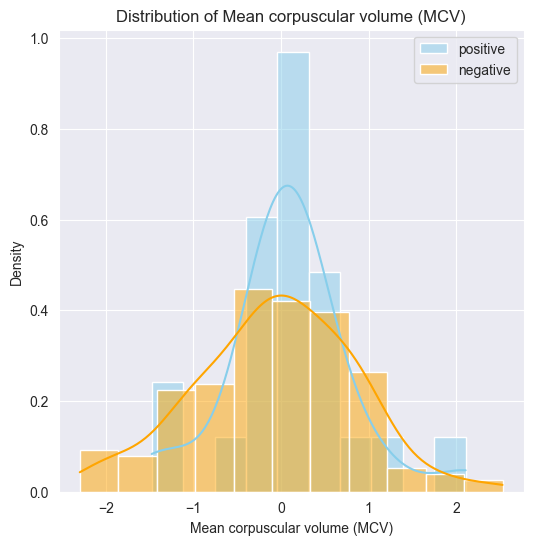

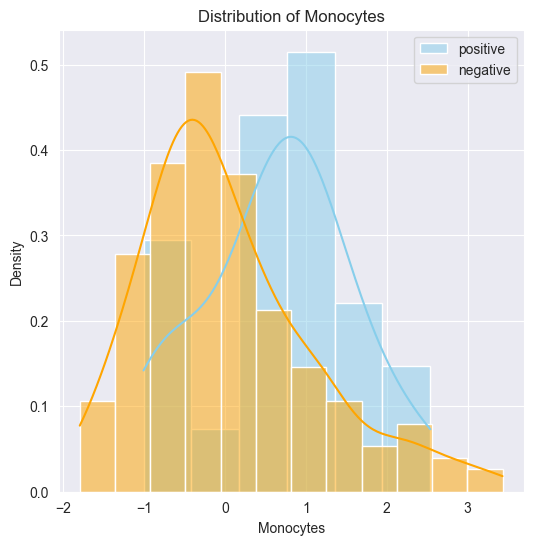

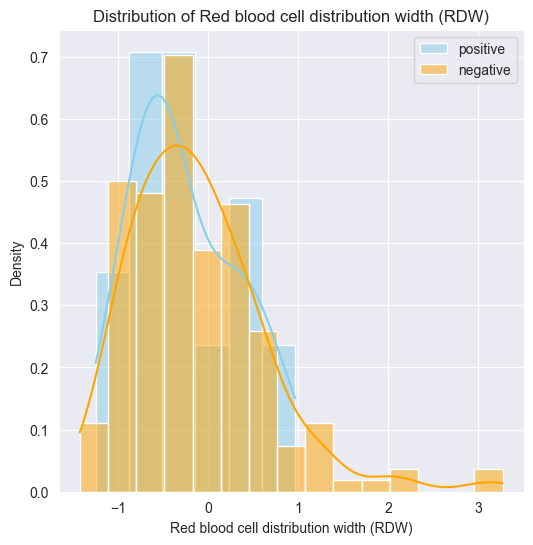

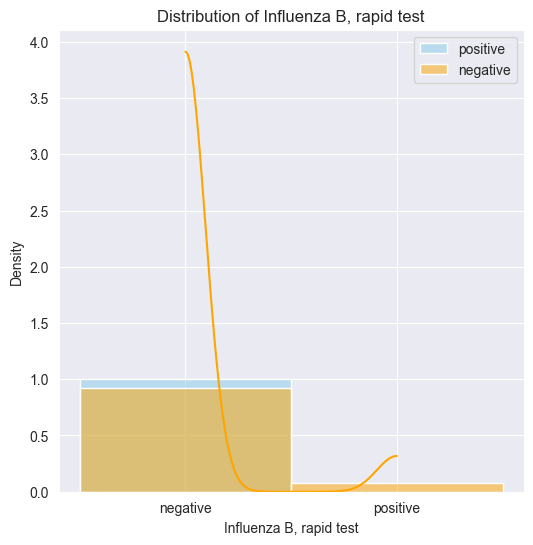

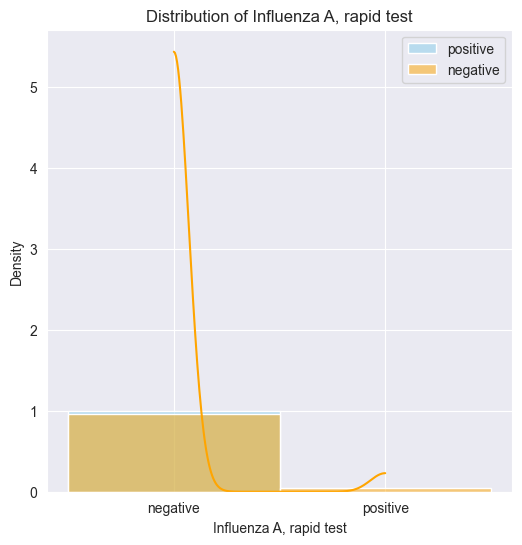

In [25]:
# Tracé des distributions
for col in blood_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=df_pos[col], stat='density', alpha=0.5, label='positive', kde=True, color='skyblue')
    sns.histplot(data=df_neg[col], stat='density', alpha=0.5, label='negative', kde=True, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

<Axes: xlabel='Patient age quantile', ylabel='count'>

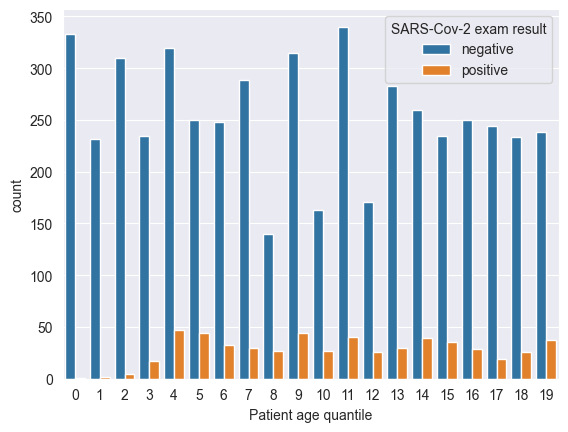

In [26]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

In [29]:
df['Patient age quantile'] 

0       13
1       17
2        8
3        5
4       15
        ..
5639     3
5640    17
5641     4
5642    10
5643    19
Name: Patient age quantile, Length: 5644, dtype: int64